# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [62]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [63]:
sinasc_raw.shape

(27028, 69)

In [64]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

## Idade media das mães e dos pais por município (coluna munResNome)


In [65]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [66]:
idade_media_pais_municipio = sinasc_1.groupby('munResNome').median()
idade_media_pais_municipio

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,24.0,25.5
Alvorada D'Oeste,25.0,31.0
Ariquemes,25.0,29.0
Buritis,25.0,28.5
Cabixi,26.0,35.5
Cacaulândia,25.0,33.5
Cacoal,26.0,30.0


## Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

Coincidentemente eu nasci no dia 10 de janeiro

In [67]:
sinasc_2 = sinasc_raw[sinasc_raw['DTNASC'] == '2019-01-10'].groupby('SEXO')['PESO'].mean()
sinasc_2

SEXO
Feminino     3252.774194
Masculino    3348.114286
Name: PESO, dtype: float64

## Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [68]:
sinasc_raw.groupby('munResNome').count().sort_values(by='ORIGEM')

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Município ignorado - RO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
Castanheiras,32,32,32,32,32,32,32,30,32,32,...,32,32,32,32,32,32,32,32,32,32
Pimenteiras do Oeste,40,40,40,40,40,40,40,38,40,40,...,40,40,40,40,40,40,40,40,40,40
Primavera de Rondônia,43,43,43,43,43,43,43,12,43,43,...,43,43,43,43,43,43,43,43,43,43
Parecis,44,44,44,44,44,44,44,34,43,42,...,44,44,44,44,44,44,44,44,44,44
Rio Crespo,50,50,50,50,50,49,49,48,47,47,...,50,50,50,50,50,50,50,50,50,50
São Felipe D'Oeste,54,54,54,54,54,54,54,31,53,53,...,54,54,54,54,54,54,54,54,54,54
Teixeirópolis,64,64,64,64,64,64,64,58,64,64,...,64,64,64,64,64,64,64,64,64,64
Cacaulândia,75,75,75,75,75,74,74,72,75,74,...,75,75,75,75,75,75,75,75,75,75


Vamos ignorar o municipio: 'Município ignorado - RO' pois é uma informação nula, e vamos seguir como 'Castanheiras' sendo o município com menor número de nascimentos

- Separando apenas os dados de 'Castanheiras'.

In [39]:
sinasc_3 = sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras']
sinasc_3.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
2067,1,2496046.0,110004,1,18,1.0,8 a 11 anos,999992.0,0.0,0.0,...,3,2087,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
2300,1,7648693.0,110004,1,31,5.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2323,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
4512,1,2495279.0,110012,1,22,1.0,8 a 11 anos,521135.0,0.0,0.0,...,2,4538,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5881,1,2516047.0,110018,1,26,2.0,8 a 11 anos,NaN,0.0,0.0,...,5,5913,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5952,1,2516047.0,110018,1,32,1.0,12 anos ou mais,NaN,2.0,0.0,...,5,5984,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842


- qual a idade media, maxima, minima das maes nesse municipio?

In [40]:
sinasc_3['IDADEMAE'].mean()

27.28125

In [41]:
sinasc_3['IDADEMAE'].max()

39

In [42]:
sinasc_3['IDADEMAE'].min()

17

- qual a idade media, maxima, minima dos pais nesse municipio?

In [43]:
sinasc_3['IDADEPAI'].mean()

30.392857142857142

In [44]:
sinasc_3['IDADEPAI'].max()

43.0

In [45]:
sinasc_3['IDADEPAI'].min()

17.0

## Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



Separando uma base apenas com os dados de Março

In [46]:
sinasc_aux4 = sinasc_raw[sinasc_raw['DTNASC'] >= '2019-03-01']
sinasc_aux4.shape

(22640, 69)

In [47]:
sinasc_4 = sinasc_aux4[sinasc_aux4['DTNASC'] <= '2019-03-31']
sinasc_4.shape

(2456, 69)

In [48]:
sinasc_4.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,5,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,5,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
10,1,2679477.0,110001,1,31,5.0,8 a 11 anos,512105.0,1.0,0.0,...,5,11,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


Qual município nasceu mais bebes no mês de março?

In [49]:
sinasc_4.groupby('munResNome').count().sort_values(by='ORIGEM', ascending = False)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Porto Velho,744,743,744,744,744,732,733,722,627,567,...,744,744,744,744,744,744,744,744,744,744
Ji-Paraná,188,187,188,188,188,187,188,185,187,185,...,188,188,188,188,188,188,188,188,188,188
Vilhena,148,148,148,148,148,148,148,140,147,146,...,148,148,148,148,148,148,148,148,148,148
Ariquemes,141,141,141,141,141,139,141,138,139,137,...,141,141,141,141,141,141,141,141,141,141
Cacoal,133,133,133,133,133,132,133,131,132,133,...,133,133,133,133,133,133,133,133,133,133
Jaru,80,79,80,80,80,79,80,77,78,78,...,80,80,80,80,80,80,80,80,80,80
Guajará-Mirim,75,73,75,75,75,75,74,64,73,73,...,75,75,75,75,75,75,75,75,75,75
Rolim de Moura,69,69,69,69,69,68,69,58,69,69,...,69,69,69,69,69,69,69,69,69,69
Ouro Preto do Oeste,67,67,67,67,67,67,67,60,67,67,...,67,67,67,67,67,67,67,67,67,67


- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

In [50]:
sinasc_4_PortoVelho = sinasc_4[sinasc_4['munResNome'] == 'Porto Velho']

In [51]:
sinasc_4_PortoVelho.shape

(744, 69)

In [52]:
sinasc_4_PortoVelho.QTDFILVIVO.mean()

1.2950558213716108

In [53]:
sinasc_4_PortoVelho.QTDFILVIVO.max()

9.0

In [54]:
sinasc_4_PortoVelho.QTDFILVIVO.min()

0.0

- qual a idade media, maxima, minima dos pais nesse municipio?

In [55]:
sinasc_4_PortoVelho.groupby('munResNome').aggregate({'IDADEMAE':'mean', 'IDADEPAI':'mean'})

,IDADEMAE,IDADEPAI
munResNome,,
Porto Velho,26.596774,34.629032


In [56]:
sinasc_4_PortoVelho.groupby('munResNome').aggregate({'IDADEMAE':'max', 'IDADEPAI':'max'})

,IDADEMAE,IDADEPAI
munResNome,,
Porto Velho,44,62.0


In [57]:
sinasc_4_PortoVelho.groupby('munResNome').aggregate({'IDADEMAE':'min', 'IDADEPAI':'min'})

,IDADEMAE,IDADEPAI
munResNome,,
Porto Velho,14,19.0


## Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

A informação de mais relevãncia que podemos trabalhar é o APGAR5 que seria uma métrica de saúde dos Bebes, com base nela, vamos fazer algumas correlações.

In [58]:
APGAR5_por_idade_media = sinasc_raw.groupby('APGAR5').aggregate({'IDADEMAE':'mean', 'IDADEPAI':'mean'})

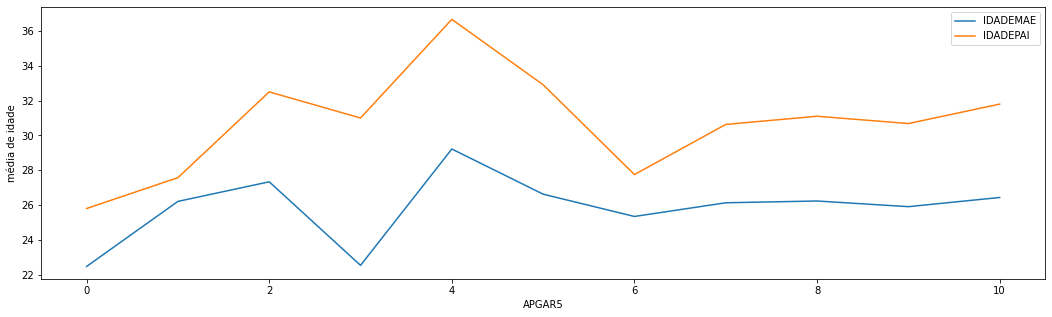

In [59]:
APGAR5_por_idade_media.plot(figsize=[18,5])
plt.ylabel('média de idade');

Primeira Observação: existe uma relação de APGAR5 versus idade médias, notamos que apartir do APGAR5 > 8, que o APGAR considerado bom, temos uma idade média linear, tanto para os pais quanto para as mães. 
a idade média das mães acima de 32 sugere um APGAR5 entre 2 e 5, assim como idade médias dos pais próximo a 22 anos, sugere uma APGAR5 de 0 ou 3.

In [60]:
sinasc_raw.groupby('munResNome').aggregate({'APGAR5':'mean'}).sort_values(by='APGAR5', ascending = True)

,APGAR5
munResNome,
Nova Brasilândia D'Oeste,8.785441
Machadinho D'Oeste,8.917172
Vale do Anari,8.946237
Primavera de Rondônia,8.953488
Espigão D'Oeste,8.977679
São Francisco do Guaporé,9.003311
Costa Marques,9.008621
Presidente Médici,9.019802
Castanheiras,9.031250


O APGAR5 médio por região tem uma variação de 1 ponto, quando comparamos o pior com o melhor município, temos 5 municípios com o APGAR5 abaixo de 9, o que mostra que essas regiões precisam de mais atenção.

In [69]:
sinasc_raw.groupby('SEXO').aggregate({'APGAR5':'mean'}).sort_values(by='APGAR5', ascending = True)

,APGAR5
SEXO,
Masculino,9.173740
Feminino,9.185638


Quando olhamos por sexo do bebe, não vemos uma diferença, sendo assim, o sexo não influencia na APGAR, já as região de parto e idade dos pais sim.

<AxesSubplot:xlabel='APGAR5'>

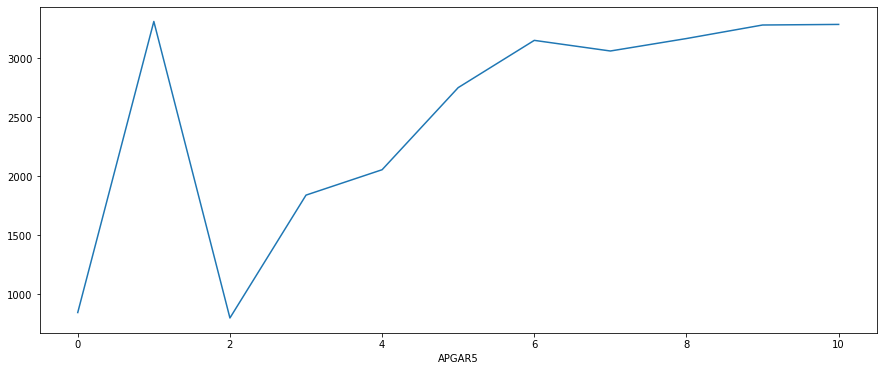

In [75]:
sinasc_raw.groupby(['APGAR5'])['PESO'].median().plot(figsize=[15,6])

Apesar do peso dos bebes com APGAR5 = 1 estar com uma boa média, vemos que existe uma corelação nos valores de APGAR5 = 0, 2, 3, 4 e 5. Que são considerados APGAR5 ruins e as criaças tendem a ter um peso abaixo de 3 kilos. 

<AxesSubplot:xlabel='ESCMAE'>

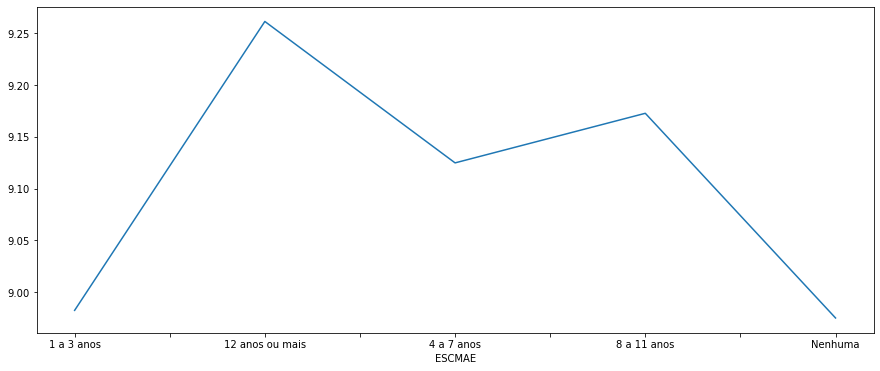

In [96]:
sinasc_raw.groupby(['ESCMAE'])['APGAR5'].mean().plot(figsize=[15,6])

Em casos de mães com nenhuma escolaridade, ou com até 3 anos de escolaridade, vemos que o nível médios de médio de APGAR5 é impactado.

<AxesSubplot:xlabel='ESTCIVMAE'>

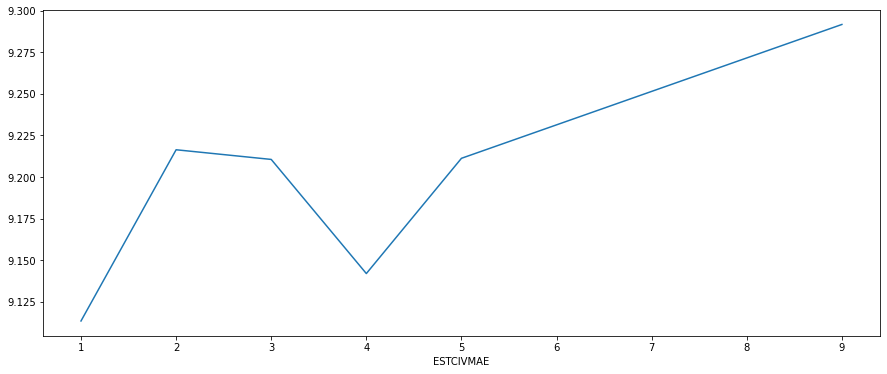

In [98]:
sinasc_raw.groupby(['ESTCIVMAE'])['APGAR5'].mean().plot(figsize=[15,6])

Também vemos outra correlação, quando comparamos o Estado civil da mãe, a partir do Estado Civil 6 a média de APGAR5 é maior.